Camera make, model and iso are not specified


Initializing camera simulator...



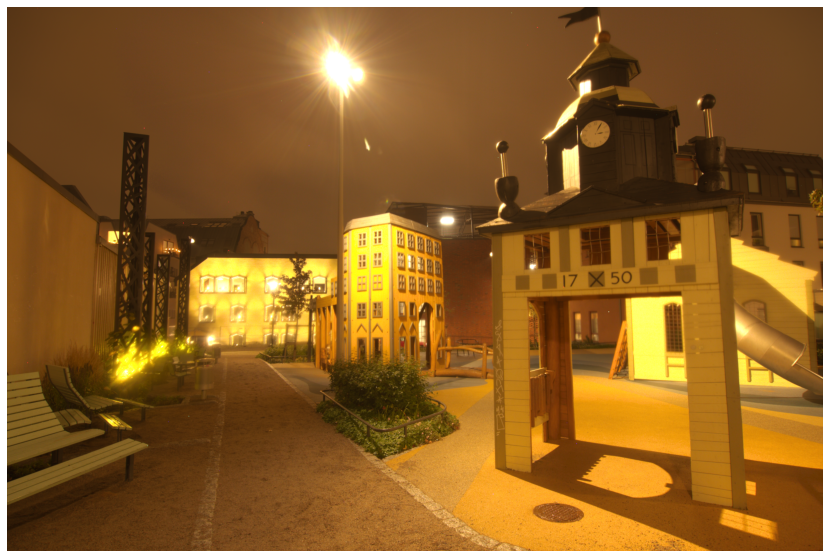

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import img_io
import camera_sim

img_source = 'test.exr'
clip = 97  # How many pixels that will not be saturated, for exposure tuning

cs = camera_sim.CameraSim()
H = img_io.readEXR(img_source)

exposure = 1/np.percentile(H,clip) # Exposure based on the clipping point
sind = np.random.randint(0, cs.N)  # Random camera response function

L, crf = cs.capture(exposure*H, 'rand', sind, noise=False)

plt.figure(figsize=(20,10))
plt.imshow(L)
plt.axis('off')
img_io.writeLDR(L,'test.png')

### Examples of different camera response functions (CRFs)

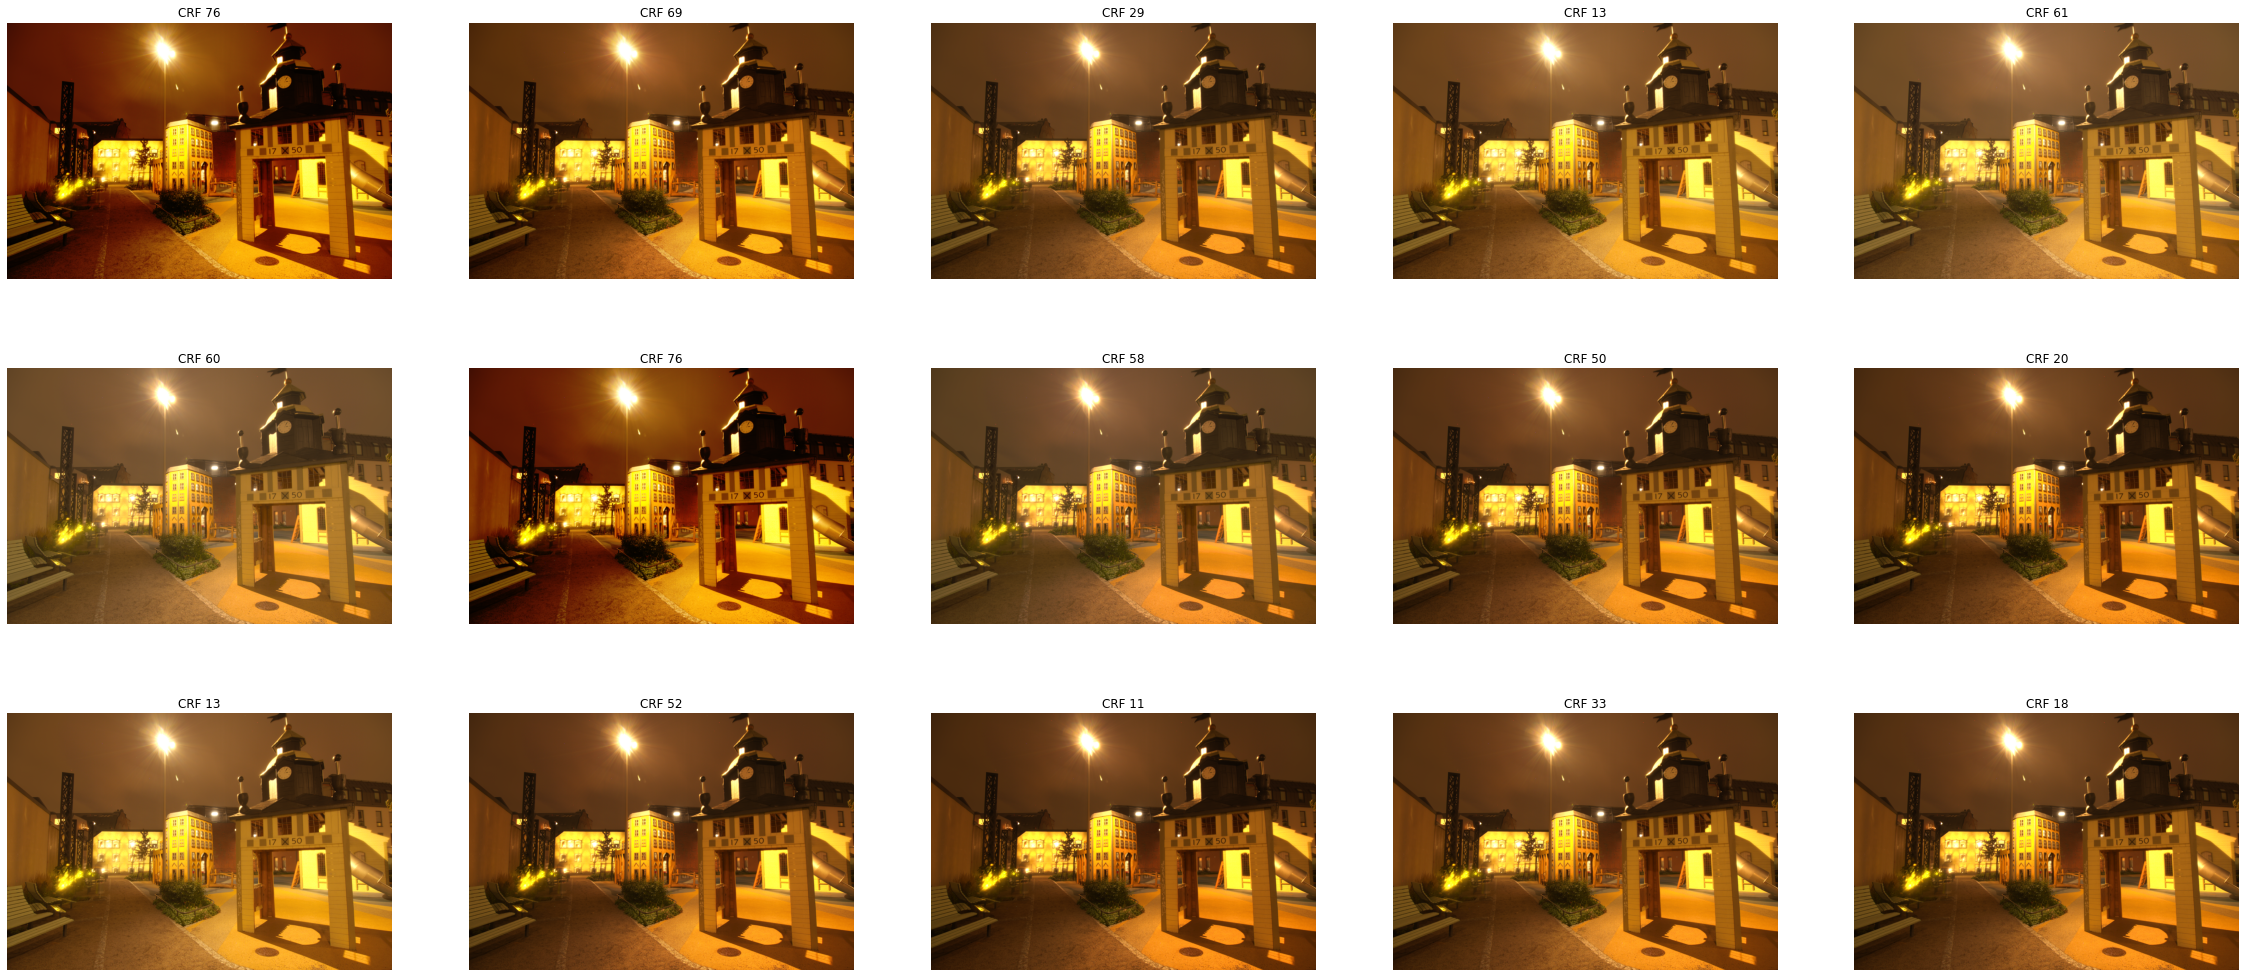

In [2]:
xx=5
yy=3
exposure = 1/np.percentile(H,clip)

plt.figure(figsize=(40,6*yy))
for i in range(xx*yy):
    sind = np.random.randint(0, cs.N) # Random camera response function
    
    L, crf = cs.capture(exposure*H, 'rand', sind, noise=False)

    plt.subplot(yy,xx,i+1)
    plt.imshow(L)
    plt.title('CRF %d'%sind)
    plt.axis('off')
plt.show()